In [1]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기

#필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 🗂️ Step 2: 데이터 불러오기

#CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [4]:
# 여기에서 확인해 보세요.
print("학습 이미지 데이터의 shape:", train_images.shape)
print("학습 라벨 데이터의 shape:", train_labels.shape)

print("테스트 이미지 데이터의 shape:", test_images.shape)
print("테스트 라벨 데이터의 shape:", test_labels.shape)

학습 이미지 데이터의 shape: (50000, 32, 32, 3)
학습 라벨 데이터의 shape: (50000, 1)
테스트 이미지 데이터의 shape: (10000, 32, 32, 3)
테스트 라벨 데이터의 shape: (10000, 1)


In [5]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요.
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [9]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # TODO: 은닉층 유닛 수 설정
model.add(layers.Dense(10))  # 출력층: CIFAR-10은 클래스가 10개

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요.
(padding은 디폴트로 없습니다.)

Answer:
1. ` Conv2D(32, (3, 3), activation='relu')`  : (32 - 3) + 1 x (32-  3) + 1 x 32 (커널 개수) -> **30 x 30 x 32**
2. `MaxPooling2D((2, 2))` : (30-2) / 2 + 1 x (30-2) / 2 + 1 x 32 -> **15 x 15 x 32**
3. `Conv2D(64, (3, 3), activation='relu')` : (15 - 3) + 1 x (15 - 3) + 1 x 64 -> **13 x 13 x 64**
4. `MaxPooling2D((2, 2))` : (13 - 2) / 2 + 1 x (13 - 2) / 2 + 1 x 64 -> **6 x 6 x 64**
5. `Conv2D(64, (3, 3), activation='relu')` : (6 - 3) + 1 x (6 - 3) + 1 x 64 -> **4 x 4 x 64**
6. `Flatten()` : 4 x 4 x 64 -> **1024**


In [10]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2977 - loss: 2.4058 - val_accuracy: 0.4705 - val_loss: 1.4583
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5092 - loss: 1.3600 - val_accuracy: 0.5582 - val_loss: 1.2347
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5835 - loss: 1.1739 - val_accuracy: 0.5622 - val_loss: 1.2533
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6289 - loss: 1.0625 - val_accuracy: 0.6268 - val_loss: 1.0743
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6670 - loss: 0.9520 - val_accuracy: 0.6174 - val_loss: 1.1255
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6847 - loss: 0.8971 - val_accuracy: 0.6573 - val_loss: 1.0270
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7090 - loss: 0.8418 - val_accuracy: 0.6740 - val_loss: 0.9941
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7256 - loss: 0.7891 - 

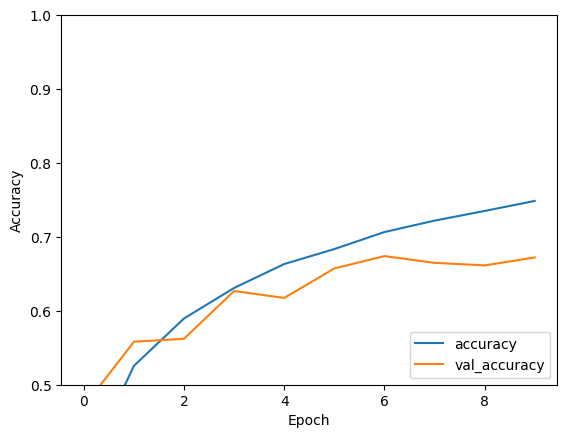

In [11]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [12]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6722000241279602


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


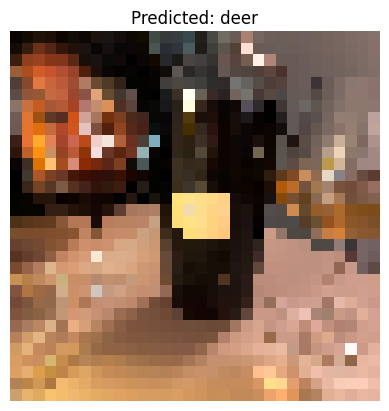

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path =  "/content/IMG_0281.JPG"
predict_new_image(image_path, model, class_names)


## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

Answer: 일반적인 컬러 이미지는 각 픽셀이 0부터 255까지의 정수 값을 가진다. 이 때, 신경망에서 사용하는 활성화 함수는 보통 0~1 범위에서 잘 작동한다.


따라서, **0에서 255 범위의 수를 0에서 1 범위로 정규화하기 위해** 255로 나누어주는 것이다.

## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer:
## CNN이 이미지 처리에 좋은 이유

CNN의 다음과 같은 특징이 이미지 처리 성능에 있어 도움을 준다.

1. 지역성 : 이미지에서 작은 영역을 먼저 인식해서 전체를 이해함.
2. 공간구조 보존 : 이미지 자체의 위치 정보를 유지하면서 특징을 추출함.
3. 계층적 표현 학습 : 엣지 -> 모양 -> 객체 단위로 점점 복잡한 특징 학습 가능

## 이미지 처리 외 CNN의 활용 분야

위에서 말했듯이, CNN은 위치 정보를 저장하면서 인근의 데이터들을 묶어서 처리를 한다는 특징으로 인해 위치와 패턴이 중요한 데이터에 있어 매우 효과적으로 작동한다.

이러한 특성이 나타나는 데이터는 다음과 같다.

- 시계열 데이터
- 음성, 오디오 처리
- 유전체 분석

위와 같은 분야에서도 CNN의 inductive bias를 살려 잘 사용할 수 있다.